In [1]:
%matplotlib inline

from pylab import *
import matplotlib.pyplot as plt


Initialisation
==============

* importing pyAgrum
* importing pyAgrum.lib tools
* loading a BN

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.pretty_print import pretty_cpt

## Create a first BN : bn

In [6]:
bn=gum.loadBN("../resources/asia.bif")
# randomly re-generate parameters for every Conditional Probability Table
bn.generateCPTs() 
gnb.showBN(bn,size="3",format="svg")

## Create a second BN : bn2

In [5]:
bn2=gum.loadBN("../resources/asia.bif")
bn2.generateCPTs()
gnb.showBN(bn,size="3",format="svg")

## bn vs bn2 : different parameters

In [7]:
from IPython.display import HTML
HTML('<table><tr><td>a CPT in bn</td><td>same CPT in bn2</td></tr><tr><td><pre>'+pretty_cpt(bn.cpt(3))+'</pre></td><td><pre>'+pretty_cpt(bn2.cpt(3))+'</pre></td></tr></table>')

a CPT in bn,same CPT in bn2
|---------------| -----------------------|positive_XraY? | tuberculos_or_cancer? | 0 1 | -----------------------|---------------| 0 | 0.2453 0.7547 | 1 | 0.3586 0.6414 | -----------------------|---------------|,|---------------| -----------------------|positive_XraY? | tuberculos_or_cancer? | 0 1 | -----------------------|---------------| 0 | 0.2521 0.7479 | 1 | 0.0586 0.9414 | -----------------------|---------------|


## Exact and (Gibbs) approximated KL-divergence 

In order to compute KL-divergence, we just need to be sure that the 2 distributions are defined on the same domain (same variables, etc.)

<h3>Exact KL</h3>


In [8]:
g1=gum.BruteForceKL(bn,bn2)
print(g1.compute())

{'errorQP': 0, 'bhattacharya': 0.35995248747209363, 'hellinger': 0.777548101117305, 'klPQ': 2.1494895329917085, 'klQP': 1.9831104926112557, 'errorPQ': 0}


If the models are not on the same domain :

In [9]:
bn_different_domain=gum.loadBN("../resources/alarm.dsl")

# g=gum.BruteForceKL(bn,bn_different_domain) # a KL-divergence between asia and alarm ... :(
#
# would cause
#---------------------------------------------------------------------------
#OperationNotAllowed                       Traceback (most recent call last)
#
#OperationNotAllowed: this operation is not allowed : KL : the 2 BNs are not compatible (not the same vars : visit_to_Asia?)

<h3>Gibbs-approximated KL</h3>

There is something wrong with <em>Bhattacharya</em> computations...


In [10]:
g=gum.GibbsKL(bn,bn2)
g.setVerbosity(True)
g.setMaxTime(120)
g.setBurnIn(5000)
g.setEpsilon(1e-7)
g.setPeriodSize(500)

In [11]:
print(g.compute())
print("Computed in {0} s".format(g.currentTime()))

{'errorQP': 0, 'bhattacharya': -12.60110673475149, 'hellinger': 0.7770898115583824, 'klPQ': 2.153373905743851, 'klQP': 1.9755172805029095, 'errorPQ': 0}
Computed in 16.87977 s


--
stopped with epsilon=1e-07
--
Temps de calcul : 16.87977
Nombre d'itérations : 426000


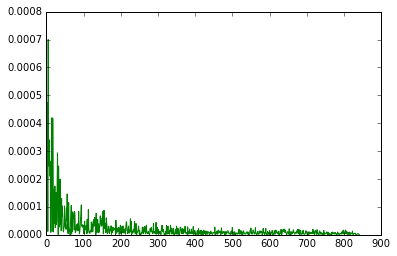

In [12]:
print("--")

print(g.messageApproximationScheme())
print("--")

print("Temps de calcul : {0}".format(g.currentTime()))
print("Nombre d'itérations : {0}".format(g.nbrIterations()))

p=plot(g.history(), 'g')

### Animation of Gibbs KL

Since it may be difficult to know what happens during approximation algorithm, pyAgrum allows to follow the iteration using animated matplotlib figure

In [13]:
g=gum.GibbsKL(bn,bn2)
g.setMaxTime(60)
g.setBurnIn(500)
g.setEpsilon(1e-7)
g.setPeriodSize(5000)

{'bhattacharya': -13.02684982411504,
 'errorPQ': 0,
 'errorQP': 0,
 'hellinger': 0.7762734009513279,
 'klPQ': 2.1438675149228668,
 'klQP': 1.971904255736206}

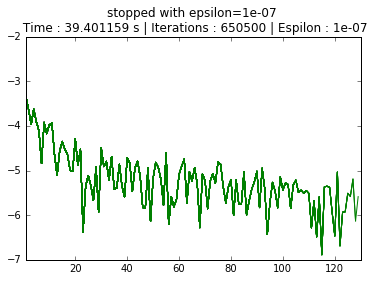

In [14]:
gnb.animApproximationScheme(g) # logarithmique scale for Y
g.compute()